<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 20 - Boosting Models (AdaBoost)</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2> Lecture Outline</h2>

<ul>
    <li>What is Boosting?</li>
    <li>Heuristics of AdaBoost</li>
    <li>The AdaBoost Algorithm</li>
    <li>Theory behind AdaBoost</li>
    <li>Python Implementation of AdaBoost</li>
   
 </ul>
 
 <h2>Boosting Models</h2>
 
 Boosting models are another example of ensemble models that aggregate multiple weaker-learners into a stronger model. 
 
 One of the main differences between Boosting and Bagging models is that while Bagging fits the weaker models independent of one another and then aggregates their results, Boosting models are <b> sequential</b> in nature. In other words, in boosting models predictors are trained sequentially, where each predictor tries to learn and improve upon its predecessors. 
 
 There are many boosting models, but the two most popular ones are <b> AdaBoost</b> (Adaptive Boosting) and <b> Gradient Boosting</b>. In this lecture we will exclusively focus on AdaBoost.
 
 <h2>AdaBoost</h2>
 
 AdaBoost is mainly designed for classification problems. 
 
 <h3>A Heuristic Explanation of AdaBoost</h3>
 
 There are many ways that a predictor can try to learn from or correct its predecessors. In the AdaBoost algorithm the way that each predictor tries to correct its predecessors is by focusing more on the portions of the training data that its predecessors did worse (e.g. underfit). So, each coming predictor focuses more and more on the difficult cases, thus improving the overall performance. 
 
 Below is a schematic of the AdaBoost algorithm. 
 
 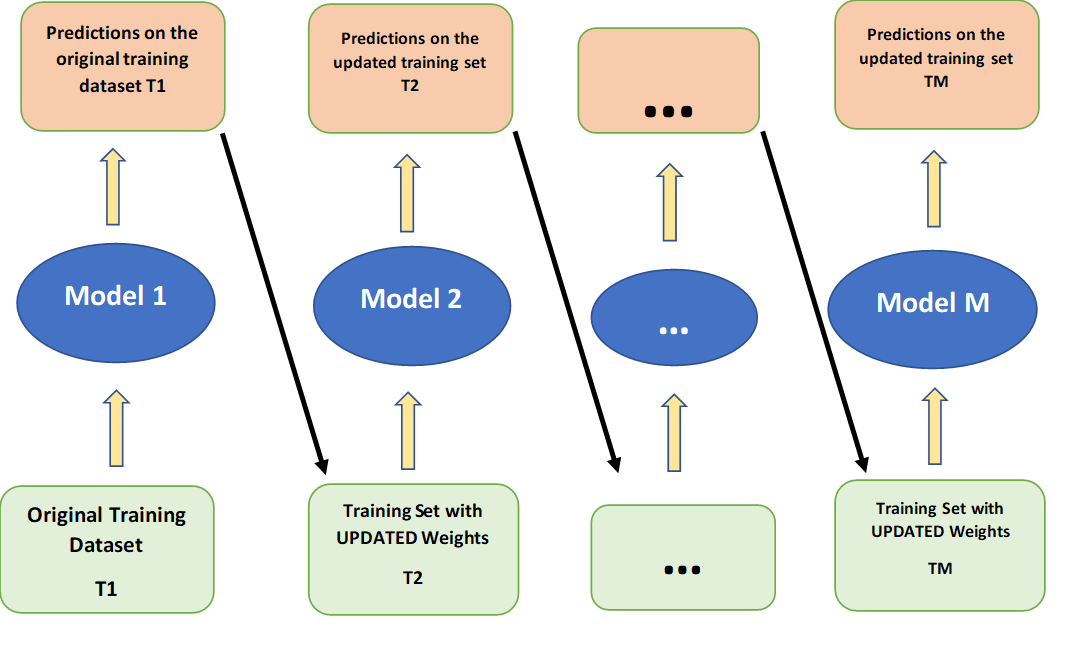
 
 
 
So, how does this work? The algorithm begins by training a base classifier (e.g. Decision Tree, Logistic Regression etc.) and uses it to make predictions. Next, it updates the weights of the training data as well as the weight of the classifier itself. Specifically, it increases the relative weights of the misclassified training data and the coefficient which signifies the importance of the classifier itself. Then it fits a second base classifier, using the updated weights, and makes predictions again. It then increases the relative weights of the missclassified data again, and computes the weight of the classifier itself and adds this classifier to the previous one. This process continues for as many steps as one wishes. 

<h2>The AdaBoost Algorithm</h2>

<font size=3>
Let $\{x_i,y_i\}_{i=1}^n$ be our training data where $x_i\in\mathbb{R}^N$ and $y_i\in\{1,-1\}$. Let $\{f_m(x)\}_{m=1}^M$ be a set of week classifiers, where $f_m(x)\in\{1,-1\}$. Let $$L_{0-1}(f_m(x_i),y_i)=\begin{cases}0 &\text{ if } f_m(x_i)=y_i\\
1 & \text{ if } f_m(x_i)\neq y_i
\end{cases}
$$

be a $0-1$ loss function.

Then, the AdaBoost algorithm works as follows:

<b>Step 1.</b>

Set the initial weights all to $\frac{1}{n}$, that is $w_i^{(1)}=\frac{1}{n}$ for $i=1,\dots, n.$

<b>Step 2.</b>

For $m=1$ to $M$ fit the week classifier $f_m$ to minimize the following objective function:

$$E_m=\frac{\sum_{i=1}^nw_i^{(m)}\mathcal{I}_{(f_m(x_i)\neq y_i)}(x_i)}{\sum_iw_i^{(m)}}$$

where 
$$\mathcal{I}_{(f_m(x_i)\neq y_i)}(x_i)=\begin{cases}1 & \text{ if } f_m(x_i)\neq y_i\\
0 & \text{ if } f_m(x_i)=y_i
\end{cases}
$$

<b>Step 2'</b>

Compute the classifier's weight $$\alpha_m=\eta \log\left(\frac{1-E_m}{E_m}\right)$$ where $\eta$ is the learning rate.

<b>Step 2''.</b>

Update weights. For $i=1,2,\dots,n$ $$w_i^{(m+1)}=w_i^{(m)}e^{-\alpha_my_if_m(x_i)}$$

If the model $f_m$ performs worse than $50\%$, we flip the sign first.

Take aways: For training samples $x_i$ that are missclassified we get $y_if_m(x_i)=-1$ and thus the corresponding weights are increased on the next step (remember $\alpha_m>0$). On the other hand, for the samples $x_i$ that are correctly classified we get $y_if_m(x_i)=1$ and thus, because $\alpha_m>0$, the weights on the next stage are decreased. 

<h3>Making Predictions</h3>

The final classifier simply computs the predictions of each individual classifier and weighs them according to their weights $\alpha_m$. That is,
$$ f(x)=sign\left(\sum_{m=1}^M\alpha_mf_m(x)\right)$$

Note, if $y_i\in\{0,1\}$ then we could define the final aggregate classifier as:

$$f(x)=\begin{cases} 1 &\text{ if } \sum_{m: f_m(x)=1}\alpha_m>\sum_{m: f_m(x)=0}\alpha_m\\
0 & \text{ otherwise }
\end{cases}
$$

<h2>Theory behind AdaBoost</h2>

To better understand how exactly after each iteration the AdaBoost algorithm focuses much more on the hard cases, we need to dig deeper into the interpretation of AdaBoost via <b> loss functions</b>.

Let $\hat{f}(x)=\sum_{m}\alpha_mf_m(x)$, then $f(x)=sign\left(\hat{f}(x)\right)$.

One, rather popular, way to think of AdaBoost is as a procedure to optimize the following exponential loss function:
$$L(x,y)=e^{-yf(x)}.$$

So, given the training data $\{(x_i,y_i)\}_{i=1}^n$ we need to optimize the following objective function with respect to the sample weights and the weight of each of week classifiers:

$$E=\sum_{i=1}^ne^{-y_i\sum_{m=1}^M\alpha_mf_m(x_i)}$$

Since the AdaBoost algorithm is sequential and greedy, at each step we add one week classifier along with its corresponding weight $\alpha$ such that it optimizes the global objective loss function $E$. Once we add a classifier and its weight, we no longer change it.

So, why is it enough to minimize this loss function $L(x,y)?$? Well, our end goal would be to minimize the $0-1$ loss function $L_{0-1}(x,y)$. However, since 

$$L(x,y)\geq L_{0-1}(x,y)$$ 

then if $L(x,y)$ is close to zero so will $L_{0-1}(x,y)$.

So, let $f_{m+1}$ be the classifier we need to add at step $m+1$. Then, the objective function that needs to be optimized is:

$$E=\sum_ie^{-y_i\sum_{j=1}^{m+1}\alpha_jf_j(x_i)}=\sum_ie^{-y_i\sum_{j=1}^m\alpha_jf_j(x_i)}e^{-y_i\alpha_{m+1}f_{m+1}({x_i})}$$

Observe, that at this state we are holding the first $m$ terms constant, so we can rewrite them as $$w_i^{(m+1)}=e^{-y_i\sum_{j=1}^m\alpha_jf_j(x_i)}\propto w_i^{(m)}e^{-y_i\alpha_mf_m(x_i)}.$$

Then, 

\begin{align*}
E&=\sum_{i=1}^n w_i^{(m+1)}e^{-y_i\alpha_{m+1}f_{m+1}(x_i)}\\
&=\sum_{i:f_{m+1}(x_i)=y_i}w_i^{(m+1)}e^{-\alpha_{m+1}}+\sum_{i:f_{m+1}(x_i)\neq y_i}w_i^{(m+1)}e^{\alpha_{m+1}}\\
&=e^{-\alpha_{m+1}}\sum_{i=1}^nw_i^{(m+1)}+\left(e^{\alpha_{m+1}}-e^{-\alpha_{m+1}}\right)\sum_{i=1}^mw_i^{(m+1)}\mathcal{I}_{(f_{m+1}(x_i)\neq y_i)}(x_i)
\end{align*}

This is the spot where it is abundandy clear why and how exactly the AdaBoost algorithm at each consecutive step pays more and more attention to the misclassified training instances. 

Specifically, optimizing the objective function above with respect to $f_{m+1}$ is equivalent to optimizing 

$$\sum_{i=1}^mw_i^{(m+1)}\mathcal{I}_{(f_{m+1}(x_i)\neq y_i)}(x_i)$$

which is precisely what AdaBoost does. In other words, if $x_i$ is misclassified at step $m$, then $y_if_m(x_i)=-1$ so $e^{-y_i\alpha_mf_m(x_i)}>1$ and since $w_i^{(m+1)}=w_i^{(m)}e^{-y_i\alpha_mf_m(x_i)}$, we see that $w_i^{(m+1)}$ will be large, so it is in the $f_{m+1}$ classifier's best interest to work much harder in correctly classifying $x_i$ at step $m+1$ so that we get $\mathcal{I}_{(f_{m+1}(x_i)\neq y_i)}(x_i)=0$ and thus in turn we manage to reach the minimum of the loss function $E$. Because, if $x_i$ gets misclassified again at step $m+1$ then the chances of converging to the minimum of the loss function $E$ are lower.

On the other hand, if $x_i$ was correctly classified at step $m$, then $y_if_m(x_i)=1$ so $e^{-y_i\alpha_mf_m(x_i)}<1$ and thus $w_i^{(m+1)}$ will be much smaller than the weight associated with the misclassified training samples, hence $f_{m+1}$ doesn't have to work as hard to correctly classify those training samples as in the case where they were missclassified, because in this case the cost would be much lower.

The value $\alpha_m$ that minimizes $E$ is a solution of $\frac{dE}{d\alpha_m}=0$ and it can be shown to be precisely 

$$\alpha_m=\log\left(\frac{1-E_m}{E_m}\right)$$ which is essentially what AdaBoost does (aside frome the added learning parmeter).

</font>

## Python Implementation

We will use the airline dataset for this portion. We will also compare the results to random forests from last lesson

In [2]:
import pandas as pd
import numpy as np

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
airline=pd.read_csv('airline_train.csv',index_col=[0])
airline.drop(airline.columns[:2],inplace=True,axis=1)
airline.dropna(inplace=True)
airline.reset_index(inplace=True,drop=True)


In [14]:

rows=random.sample(list(airline.index),10000)
airline=airline.loc[rows]

airline.reset_index(inplace=True,drop=True)
airline['satisfaction']=airline['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
X=airline.drop('satisfaction',axis=1)
y=airline['satisfaction']



In [15]:
#Convert qualitative variables to numerical dummy variables

cols=['Gender','Customer Type', 'Type of Travel','Class']

X=pd.get_dummies(data=X,columns=cols,drop_first=True)

scaler=StandardScaler()

scaled=scaler.fit_transform(X)
X_sc=pd.DataFrame(scaled,columns=X.columns)

In [21]:
X_sc.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-0.419228,-0.867975,-0.525400,-0.027950,-0.522257,0.027645,1.361060,-0.907219,-1.090704,1.242562,...,-0.232980,-0.543635,1.309805,-0.400270,-0.403873,1.001802,2.098210,-0.672631,1.083691,-0.268405
1,-0.877959,-0.860002,0.990905,-0.680977,0.915477,0.027645,-0.145787,0.580635,0.430183,-0.255584,...,-0.232980,0.310600,-0.210131,0.919977,0.868897,-0.998202,2.098210,-0.672631,1.083691,-0.268405
2,0.760367,2.785597,1.749057,1.278106,1.634344,1.593948,-0.899211,1.324563,0.430183,1.242562,...,0.547261,1.164834,0.549837,-0.400270,-0.403873,1.001802,-0.476597,-0.672631,-0.922772,-0.268405
3,1.153565,-0.886911,-2.041704,-1.987032,-1.959991,0.027645,1.361060,0.580635,0.430183,-0.255584,...,0.547261,-0.543635,1.309805,-0.057006,-0.066200,1.001802,-0.476597,-0.672631,-0.922772,-0.268405
4,1.022499,-0.339772,-0.525400,-0.680977,-0.522257,-0.755506,-1.652635,-1.651147,-0.330261,0.493489,...,0.547261,0.310600,-0.210131,-0.400270,-0.403873,1.001802,-0.476597,-0.672631,-0.922772,-0.268405


In [23]:
X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.2,random_state=43)

In [24]:
X_val.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
9415,0.105036,0.233279,0.990905,0.625078,0.915477,0.810797,0.607636,-0.907219,-0.330261,0.493489,...,0.547261,0.310600,-1.730067,-0.294650,-0.403873,1.001802,-0.476597,-0.672631,-0.922772,-0.268405
6377,1.088032,0.421638,-1.283552,-1.334005,-1.241124,-1.538658,0.607636,1.324563,1.190626,1.242562,...,1.327503,1.164834,1.309805,-0.400270,-0.403873,1.001802,-0.476597,-0.672631,-0.922772,-0.268405
8019,-0.812426,0.717631,1.749057,1.278106,1.634344,1.593948,0.607636,0.580635,0.430183,0.493489,...,-1.793463,-2.252104,0.549837,-0.400270,-0.403873,-0.998202,-0.476597,-0.672631,-0.922772,-0.268405
7754,-0.288162,-0.385616,-0.525400,-0.680977,-0.522257,0.027645,1.361060,-0.907219,-1.851147,1.242562,...,0.547261,-1.397869,1.309805,1.712125,1.076696,1.001802,2.098210,-0.672631,1.083691,-0.268405
4961,0.563768,1.477048,0.232753,0.625078,-0.522257,0.810797,-0.899211,-0.907219,0.430183,0.493489,...,0.547261,-0.543635,0.549837,1.606505,1.829968,1.001802,-0.476597,1.486699,1.083691,-0.268405


In [42]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score

We will apply AdaBoost with Decision Trees, Logistic Regression, and RF Classifier as base learners

In [39]:
#AdaBoost with Decision Tree as a base classifier

ada_tree=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=14),n_estimators=200,
                            learning_rate=0.05)

#AdaBoost with Tree Classifier w/ Cross-Validation

kf=KFold(n_splits=10,shuffle=True)

cv_tree=cross_validate(ada_tree,X_train,y_train,cv=kf)


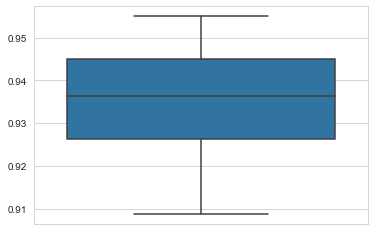

In [41]:
#Checking the Accuracy Score

sns.set_style('whitegrid')

sns.boxplot(cv_tree['test_score'],orient='vert')

In [43]:
#Test Score

ada_tree.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=14,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [44]:
pred_tree=ada_tree.predict(X_val)

In [46]:
accuracy_score(y_val,pred_tree)

0.9405

In [100]:

ada_lg=AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear', C=3,penalty='l2'),
                         n_estimators=150,learning_rate=0.5)

#AdaBoost with Tree Classifier w/ Cross-Validation

kf=KFold(n_splits=10,shuffle=True)

cv_lg=cross_validate(ada_lg,X_train,y_train,cv=kf)



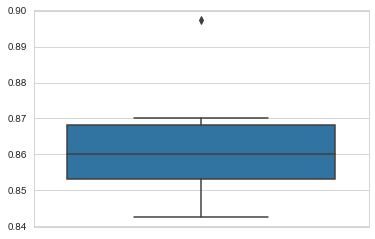

In [101]:
#Checking the Accuracy Score

sns.set_style('whitegrid')

sns.boxplot(cv_lg['test_score'],orient='vert')

In [102]:
ada_lg.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=3, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='liblinear',
                                                     tol=0.0001, verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=150, random_state=None)

In [103]:
pred_lg=ada_lg.predict(X_val)

In [104]:
accuracy_score(y_val,pred_lg)

0.867

In [181]:
#AdaBoost with Random Forest Classifier as base learner

ada_rf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50,max_depth=12,max_features=7),
                           n_estimators=80,learning_rate=0.25)

kf=KFold(n_splits=5,shuffle=True)

rf_cv=cross_validate(ada_knn,X_train,y_train,cv=kf)

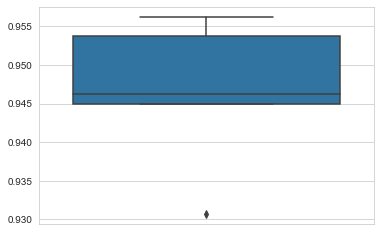

In [182]:
#Checking the Accuracy Score

sns.set_style('whitegrid')

sns.boxplot(rf_cv['test_score'],orient='vert')

In [212]:
ada_rf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50,max_depth=12,max_features=7),
                           n_estimators=80,learning_rate=0.25)
ada_rf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=12,
                                                         max_features=7,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=50,
                                

In [213]:
rf_pred=ada_rf.predict(X_val)

In [214]:
accuracy_score(y_val,rf_pred)

0.9585

Compared to just the Random Forest, form last lecture, the accuracy score is higher by over $1\%$. This appears to be pretty stable as well, so while it may not seem a significant improvement, often times in practice improving even by one percent is difficult and takes a lot of engineering.